In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from pages_to_scrape import pages

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Test out the analysis with a sample page

In [3]:
filename = "318455204949019_facebook_statuses"

In [4]:
df = pd.read_csv(filename+'.csv')

In [5]:
df['timestamp'] = pd.to_datetime(df['status_published'])

In [6]:
df.set_index(pd.DatetimeIndex(df['timestamp']), inplace=True)

In [7]:
likeMeansByDate = df["num_likes"].resample('D', how='mean').truncate(before='2010-12-27', after='2017-01-05').dropna()
commentMeansByDate = df["num_comments"].resample('D', how='mean').truncate(before='2010-12-27', after='2017-01-05').dropna()
shareMeansByDate = df["num_shares"].resample('D', how='mean').truncate(before='2010-12-27', after='2017-01-05').dropna()
postCountsByDate = df["status_id"].resample('D', how='count').truncate(before='2010-12-27', after='2017-01-05').dropna()
postCountsByDate = postCountsByDate[postCountsByDate!=0]

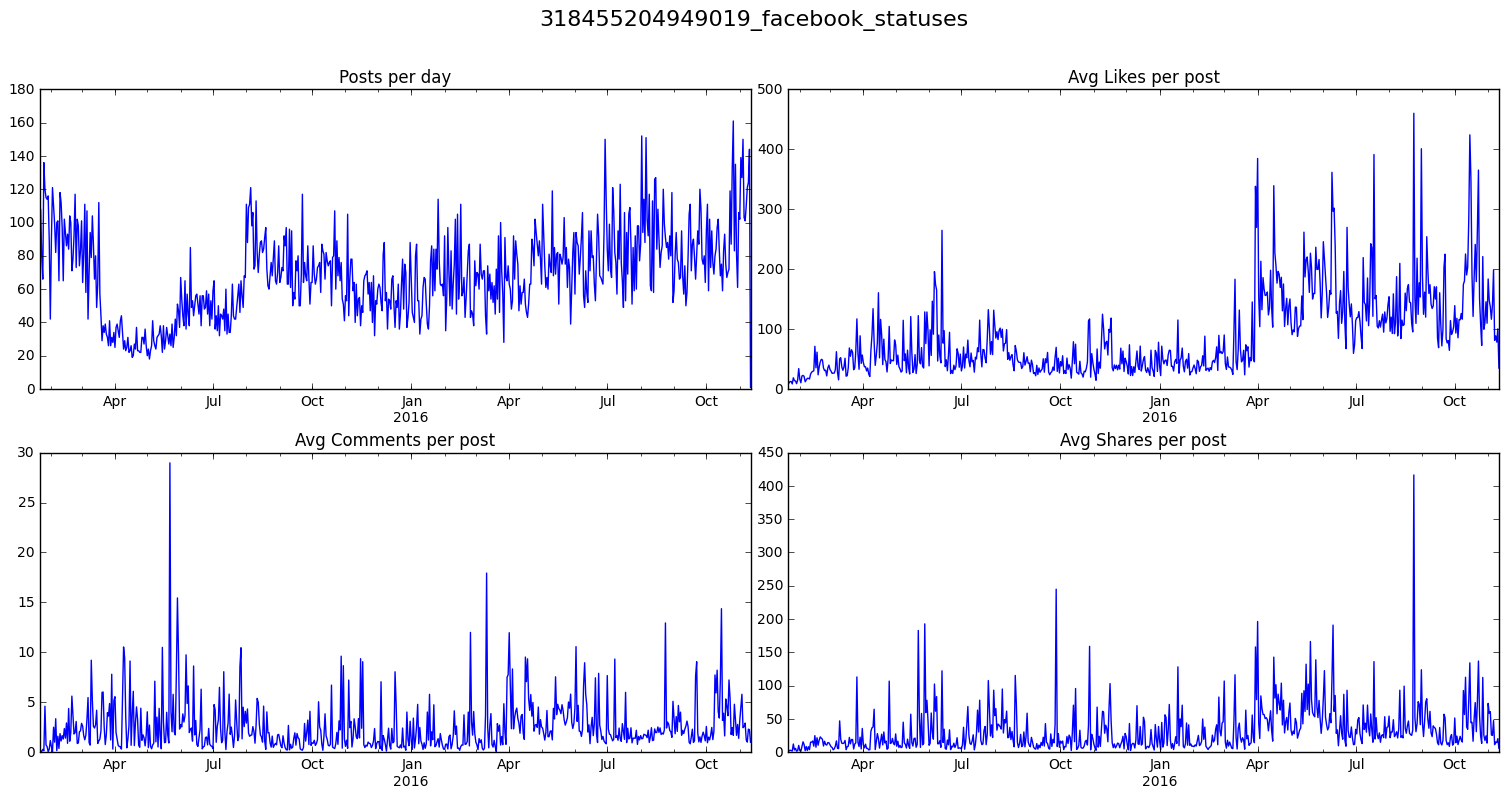

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))

postCountsByDate.plot(ax=axes[0,0]); axes[0,0].set_title('Posts per day')
likeMeansByDate.plot(ax=axes[0,1]); axes[0,1].set_title('Avg Likes per post')
commentMeansByDate.plot(ax=axes[1,0]); axes[1,0].set_title('Avg Comments per post')
shareMeansByDate.plot(ax=axes[1,1]); axes[1,1].set_title('Avg Shares per post')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.suptitle(filename, size=16)
plt.subplots_adjust(top=0.88)

## Now we loop through all the pages to make charts for all of them


In [9]:
def plotSummaryCharts(pagesToPlot):
    for p in pagesToPlot:
        # Read file
        filename = p['id'] +"_facebook_statuses"
        df = pd.read_csv('data/'+filename+'.csv')

        # Convert timestamp to proper format and set it as index
        df['timestamp'] = pd.to_datetime(df['status_published'])
        df.set_index(pd.DatetimeIndex(df['timestamp']), inplace=True)

        # Declare the data series to plot
        likeMeansByDate = df["num_likes"].resample('M', how='mean').truncate(before='2010-12-27', after='2017-01-05').dropna()
        commentMeansByDate = df["num_comments"].resample('M', how='mean').truncate(before='2010-12-27', after='2017-01-05').dropna()
        shareMeansByDate = df["num_shares"].resample('M', how='mean').truncate(before='2010-12-27', after='2017-01-05').dropna()
        postCountsByDate = df["status_id"].resample('M', how='count').truncate(before='2010-12-27', after='2017-01-05').dropna()
        postCountsByDate = postCountsByDate[postCountsByDate!=0]

        # Make plots
        fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))

        postCountsByDate.plot(ax=axes[0,0]); axes[0,0].set_title('Posts per Month')
        likeMeansByDate.plot(ax=axes[0,1]); axes[0,1].set_title('Avg Likes per post')
        commentMeansByDate.plot(ax=axes[1,0]); axes[1,0].set_title('Avg Comments per post')
        shareMeansByDate.plot(ax=axes[1,1]); axes[1,1].set_title('Avg Shares per post')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.suptitle(p['name'] + ' - ' + p['desc'], size=16)
        plt.subplots_adjust(top=0.88)

        plt.savefig(p['name'] + '.png')
        
#plotSummaryCharts(pages)

## Let's try plotting summary charts of news outlets

In [10]:
newsPages = (
    {'name': 'Myanmar Times', 'desc': ' ', 'id': 'MMTimes'},
    {'name': 'Eleven English', 'desc': ' ', 'id': 'ElevenEN'},
    {'name': 'Eleven Myanmar', 'desc': ' ', 'id': 'ElevenMM'},
    {'name': 'Irrawaddy English', 'desc': ' ', 'id': 'IrrawaddyEN'},
    {'name': 'Irrawaddy Myanmar', 'desc': ' ', 'id': 'IrrawaddyMM'},
    {'name': '7 Day', 'desc': ' ', 'id': '7Day'},
)

# {'name': 'Eleven Media Group', 'position': '2', 'desc': 'news', 'url': 'https://www.facebook.com/ElevenMediaGroup/', 'id': '114803668557265'}, 
# {'name': '7Day News Journal', 'position': '1', 'desc': 'news', 'url': 'https://www.facebook.com/7daynews/', 'id': '103865773008399'}, 


newsPages = (
{'name': '7Day News Journal', 'position': '1', 'desc': 'news', 'url': 'https://www.facebook.com/7daynews/', 'id': '7Day'}, 
#{'name': 'Eleven Media Group', 'position': '2', 'desc': 'news', 'url': 'https://www.facebook.com/ElevenMediaGroup/', 'id': 'ElevenMM'}, 
#{'name': 'BBC Burmese', 'position': '3', 'desc': 'news', 'url': 'https://www.facebook.com/bbcburmese/', 'id': '166580710064489'}, 
#{'name': 'The Irrawaddy - Burmese Edition', 'position': '4', 'desc': 'news', 'url': 'https://www.facebook.com/theirrawaddyburmese/', 'id': '121507374560090'}, 
#{'name': 'VOA Burmese News', 'position': '5', 'desc': 'news', 'url': 'https://www.facebook.com/VoA.Burmese.News/', 'id': '351574300169'}, 
#{'name': 'Telenor Myanmar', 'position': '6', 'desc': 'brand', 'url': 'https://www.facebook.com/TelenorMyanmar/', 'id': '603742072992573'},
#{'name': 'Eleven Media Group - English Edition', 'position': '15', 'desc': 'news', 'url': 'https://www.facebook.com/ElevenMediaEnglishEdition/', 'id': '485796778229676'}, 
#{'name': 'The Myanmar Times', 'position': '21', 'desc': 'news', 'url': 'https://www.facebook.com/themyanmartimes/', 'id': '269917285975'}, 
#{'name': 'Irrawaddy - English Edition', 'position': '', 'desc': 'news', 'url': 'https://www.facebook.com/theirrawaddy/', 'id': '112882212089978'},
#{'name': 'Mizzima - News in Burmese', 'position': '7', 'desc': 'news', 'url': 'https://www.facebook.com/MizzimaDaily/', 'id': '216265185075061'}, 
#{'name': 'MPT', 'position': '8', 'desc': 'brand', 'url': 'https://www.facebook.com/mptofficialpage/', 'id': '567975259969891'}, 
#{'name': 'Myanmar Model Girls', 'position': '9', 'desc': 'media', 'url': 'https://www.facebook.com/myanmarmodelgirls/', 'id': '124614897623817'}, 
#{'name': 'MRTV-4', 'position': '10', 'desc': 'news', 'url': 'https://www.facebook.com/MRTV4/', 'id': '144593305597986'}, 
#{'name': 'Yoyarlay', 'position': '11', 'desc': 'blog', 'url': 'https://www.facebook.com/YoYarLay/', 'id': '171647766211817'}, 
#{'name': 'Sai Sai Kham Leng', 'position': '12', 'desc': 'celebrity', 'url': 'https://www.facebook.com/saisaifanpage/', 'id': '52493341874'}, 
#{'name': 'DVB TV News', 'position': '13', 'desc': 'news', 'url': 'https://www.facebook.com/DVBTVNews/', 'id': '191574990881009'}, 
#{'name': 'Yee Sa Yar', 'position': '14', 'desc': 'media - defunct', 'url': 'https://www.facebook.com/mmfunny/', 'id': '662018287201628'}, 
#{'name': 'Eleven Media Group - English Edition', 'position': '15', 'desc': 'news', 'url': 'https://www.facebook.com/ElevenMediaEnglishEdition/', 'id': '485796778229676'}, 
# 500 error {'name': 'Myanmar Celebrities', 'position': '16', 'desc': 'celebrity', 'url': 'https://www.facebook.com/myanmarcelebrities/', 'id': '280411788722016'}, 
#{'name': 'MRTV', 'position': '17', 'desc': 'news', 'url': 'https://www.facebook.com/mrtvwebmediaportal/', 'id': '523763414336156'}, 
#{'name': 'Thit Htoo Lwin', 'position': '18', 'desc': 'blog', 'url': 'https://www.facebook.com/ThitHtooLwinOfficialPage/', 'id': '598533370174819'}, 
#{'name': 'Ooredoo Myanmar', 'position': '19', 'desc': 'brand', 'url': 'https://www.facebook.com/OoredooMyanmar/', 'id': '395256057264307'}, 
#{'name': 'Kumudra', 'position': '20', 'desc': 'news', 'url': 'https://www.facebook.com/kumudranews/', 'id': '212802105455124'}, 
#{'name': 'The Myanmar Times', 'position': '21', 'desc': 'news', 'url': 'https://www.facebook.com/themyanmartimes/', 'id': '269917285975'}, 
#{'name': 'Nature Republic Myanmar', 'position': '22', 'desc': 'celebrity', 'url': 'https://www.facebook.com/NatureRepublicMyanmar/', 'id': '531389933568151'}, 
#{'name': 'Lay Phyu Crazy', 'position': '23', 'desc': 'celebrity', 'url': 'https://www.facebook.com/LayPhyuCrazy/', 'id': '372009456212495'}, 
#{'name': 'Myanmar Update News Agency', 'position': '24', 'desc': 'news', 'url': 'https://www.facebook.com/MyanmarUpdateNewsAgency/', 'id': '1024691730906390'}, 
#{'name': 'Myanmarload.com', 'position': '25', 'desc': 'news', 'url': 'https://www.facebook.com/myanmarload/', 'id': '740801392689386'}, 
#{'name': 'Eleven Broadcasting', 'position': '26', 'desc': 'news', 'url': 'https://www.facebook.com/elevenbroadcasting/', 'id': '1627797554143389'}, 
#{'name': 'Pho Thu Taw', 'position': '27', 'desc': 'blog', 'url': 'https://www.facebook.com/phothutawnews/', 'id': '184607901719903'}, 
#{'name': 'Shwemom', 'position': '28', 'desc': 'lifestyle', 'url': 'https://www.facebook.com/shwemom/', 'id': '427755920709999'}, 
#{'name': 'MyFood Myanmar', 'position': '29', 'desc': 'food', 'url': 'https://www.facebook.com/MyFoodMyanmar/', 'id': '621512044648350'}, 
#{'name': 'Duwun', 'position': '30', 'desc': 'media', 'url': 'https://www.facebook.com/duwun/', 'id': '484994444995990'}, 
#{'name': 'Eleven Sports', 'position': '31', 'desc': 'news', 'url': 'https://www.facebook.com/elevensportsjournal/', 'id': '1638969433022608'}, 
{'name': 'National League for Democracy', 'position': '32', 'desc': 'political', 'url': 'https://www.facebook.com/NLDParty/', 'id': '199678676714208'}, 
#{'name': 'MM Book City', 'position': '33', 'desc': 'inspirational', 'url': 'https://www.facebook.com/mmbookcity/', 'id': '509356909162087'}, 
#{'name': 'Vivo Myanmar', 'position': '34', 'desc': 'brand', 'url': 'https://www.facebook.com/vivomobileMM/', 'id': '1439046226361639'}, 
#{'name': 'Lwin Pyin', 'position': '35', 'desc': 'media', 'url': 'https://www.facebook.com/lwinpyinnews/', 'id': '588247487910938'}, 
#{'name': 'Aung San Suu Kyi', 'position': '36', 'desc': 'political', 'url': 'https://www.facebook.com/aungsansuukyi/', 'id': '9953503420'}, 
#{'name': 'Samsung Mobile Myanmar', 'position': '37', 'desc': 'brand', 'url': 'https://www.facebook.com/SamsungMobileMyanmar/', 'id': '1476399162599351'}, 
#{'name': 'OPPO', 'position': '38', 'desc': 'brand', 'url': 'https://www.facebook.com/oppomyanmar/', 'id': '287391841418711'}, 
#{'name': 'Wutt Hmone Shwe Yi', 'position': '39', 'desc': 'celebrity', 'url': 'https://www.facebook.com/wutthmoneshweyi/', 'id': '240382364361'}, 
#{'name': 'Myawaddy', 'position': '40', 'desc': 'news', 'url': 'https://www.facebook.com/mwdmedia/', 'id': '246194712164341'}, 
#{'name': 'Red dot Network', 'position': '41', 'desc': 'brand', 'url': 'https://www.facebook.com/ReddotNetworkMyanmarOfficialpage/', 'id': '381816035284331'}, 
#{'name': 'rgo47', 'position': '42', 'desc': 'ecommerce', 'url': 'https://www.facebook.com/rgo47/', 'id': '195066640650758'}, 
#{'name': 'British Council Myanmar', 'position': '43', 'desc': 'organization', 'url': 'https://www.facebook.com/BritishCouncilMyanmar/', 'id': '59261833855'}, 
#{'name': 'KBZ BANK', 'position': '44', 'desc': 'brand', 'url': 'https://www.facebook.com/KanbawzaBank/', 'id': '393033680732657'}, 
#{'name': 'mJams', 'position': '45', 'desc': 'brand', 'url': 'https://www.facebook.com/mjamsmusic/', 'id': '681230908680776'}, 
#{'name': 'MyJobs.com.mm Myanmar', 'position': '46', 'desc': 'brand', 'url': 'https://www.facebook.com/MyJobsMyanmar/', 'id': '369107489814175'}, 
#{'name': 'PannPwint', 'position': '47', 'desc': 'poetry', 'url': 'https://www.facebook.com/pannpwint/', 'id': '1553092038292792'}, 
#{'name': 'Acecook Myanmar', 'position': '48', 'desc': 'food', 'url': 'https://www.facebook.com/AcecookMyanmar/', 'id': '691124697646404'}, 
{'name': 'Office of Commander in Chief', 'position': '50', 'desc': 'political', 'url': 'https://www.facebook.com/Cincds/', 'id': '526503167470553'}
)


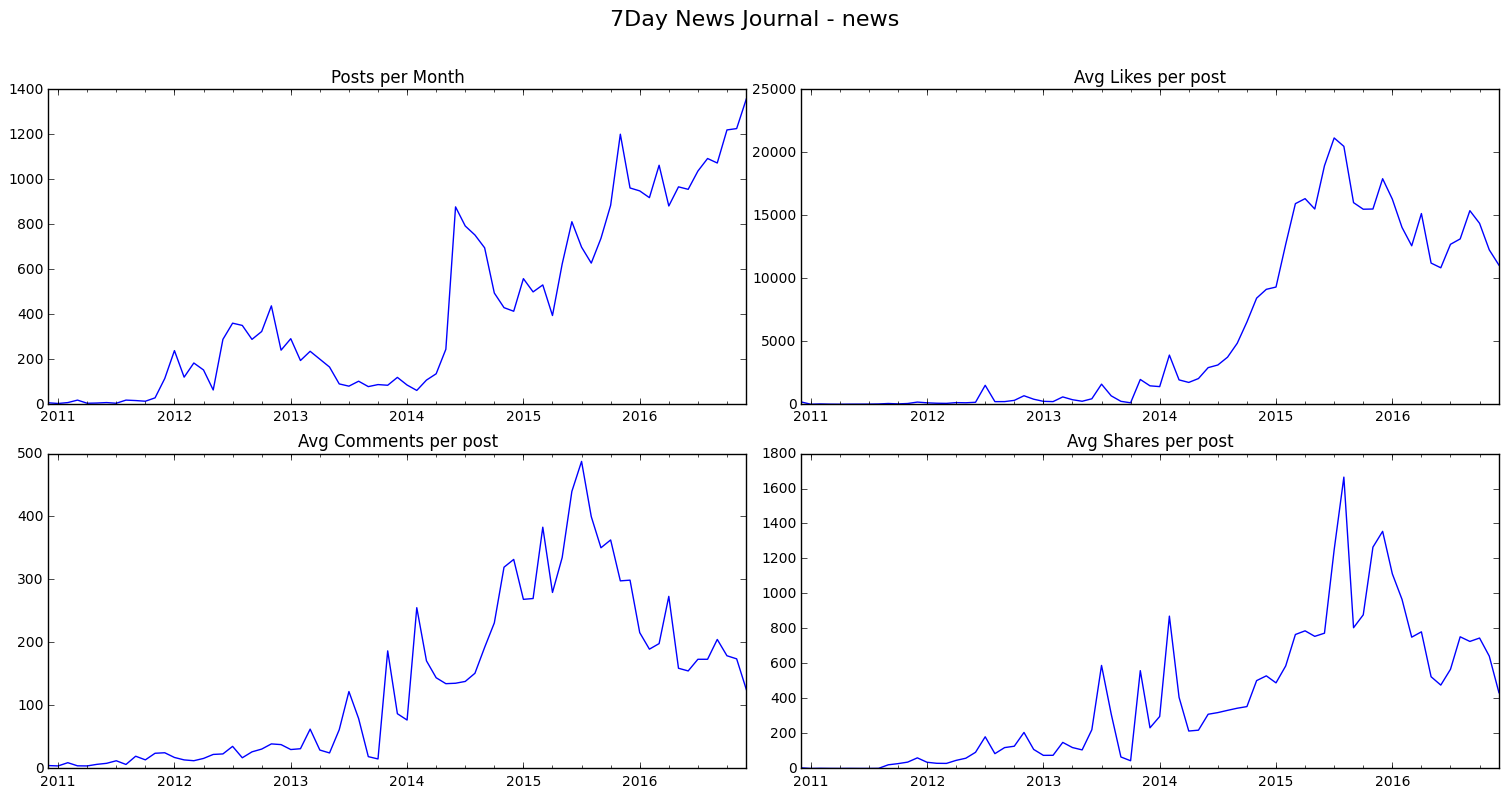

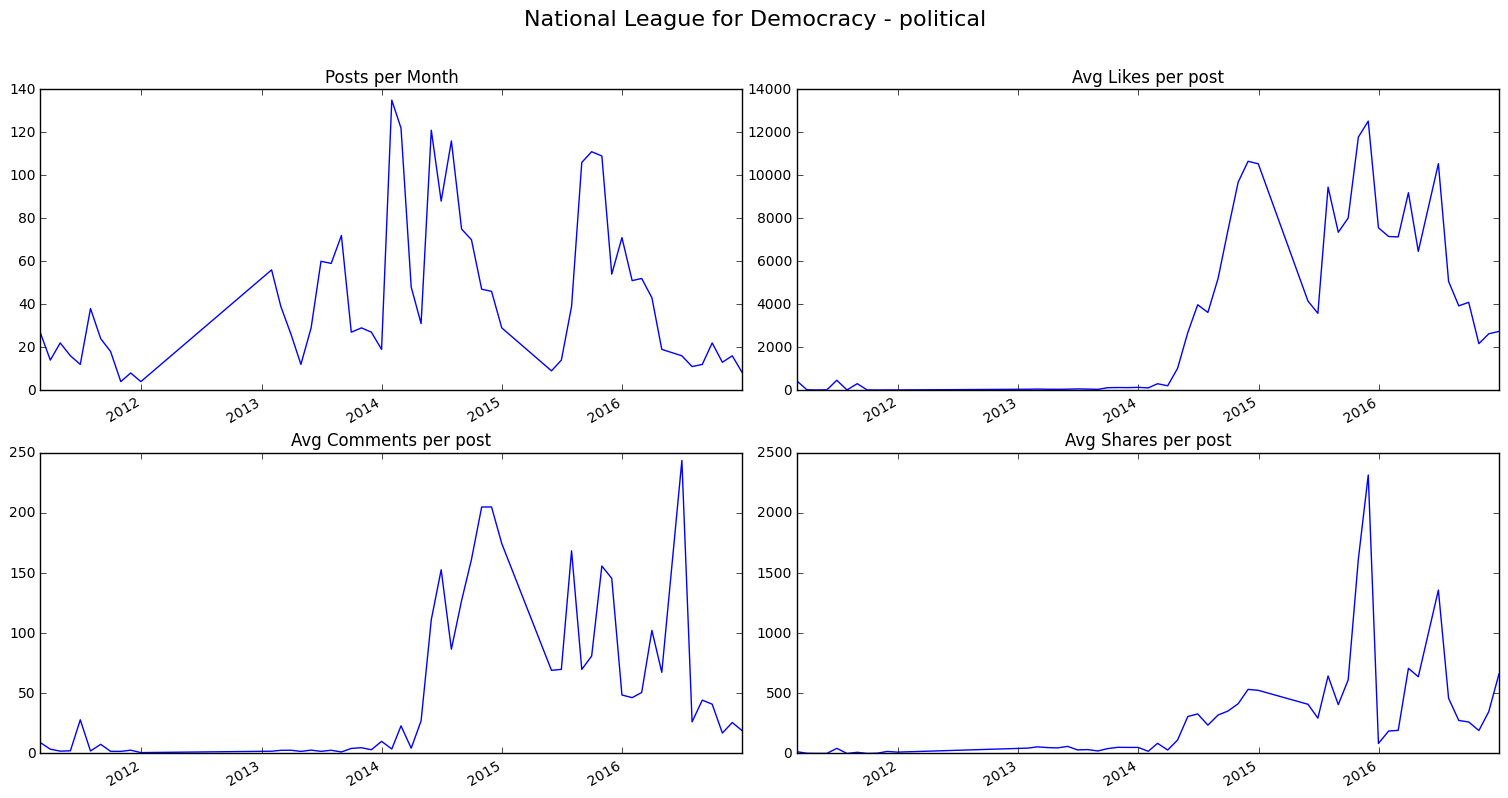

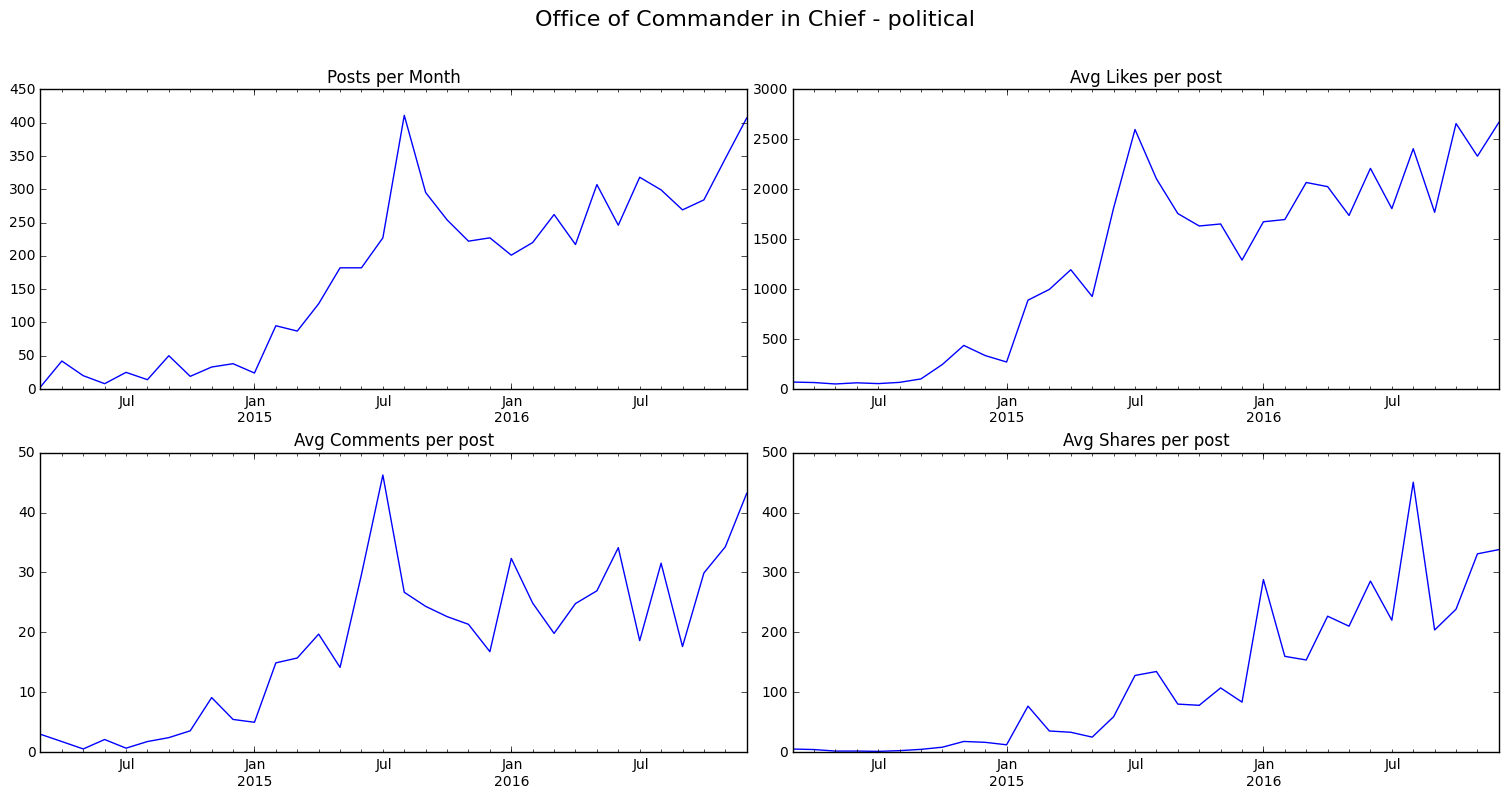

In [11]:
plotSummaryCharts(newsPages)

## Box plots of comments

In [12]:
#spread = np.random.rand(50) * 100
#center = np.ones(25) * 50
#flier_high = np.random.rand(10) * 100 + 100
#flier_low = np.random.rand(10) * -100
#data = np.concatenate((spread, center, flier_high, flier_low), 0)

In [13]:
#filename = "268215723232418_facebook_posts_and_comments" # Thant Myint-U
#filename = "698627660171725_facebook_posts_and_comments" # Min Aung Hlaing
filename = "MinKoNaing_facebook_posts_and_comments" # Min Ko Naing
#filename = "1547146415542281_facebook_posts_and_comments" # Thura Shwe Mann
#filename = "1656635027906194_facebook_posts_and_comments" # Zin Mar Aung#

page_name = "Zin Mar Aung"

df = pd.read_csv(filename+'.csv')
df['status_published_dt'] = pd.to_datetime(df['status_published'])
df['year'] = pd.DatetimeIndex(df['status_published_dt']).year
df['month'] = pd.DatetimeIndex(df['status_published_dt']).month
comment_counts = df.pivot_table(index=['year','month','status_id'], aggfunc='count')['comment_id']

In [14]:
#plot_data = [comment_counts[2012],comment_counts[2014],comment_counts[2016]]
#plot_data = [comment_counts[2014],comment_counts[2016]]

In [15]:
plot_data = []
plot_axes_labels = []
for year in comment_counts.index.levels[0]:
    for month in comment_counts[year].index.levels[0]:
        plot_axes_labels.append(str(month) + "-" + str(year))
        plot_data.append(comment_counts[year][month])

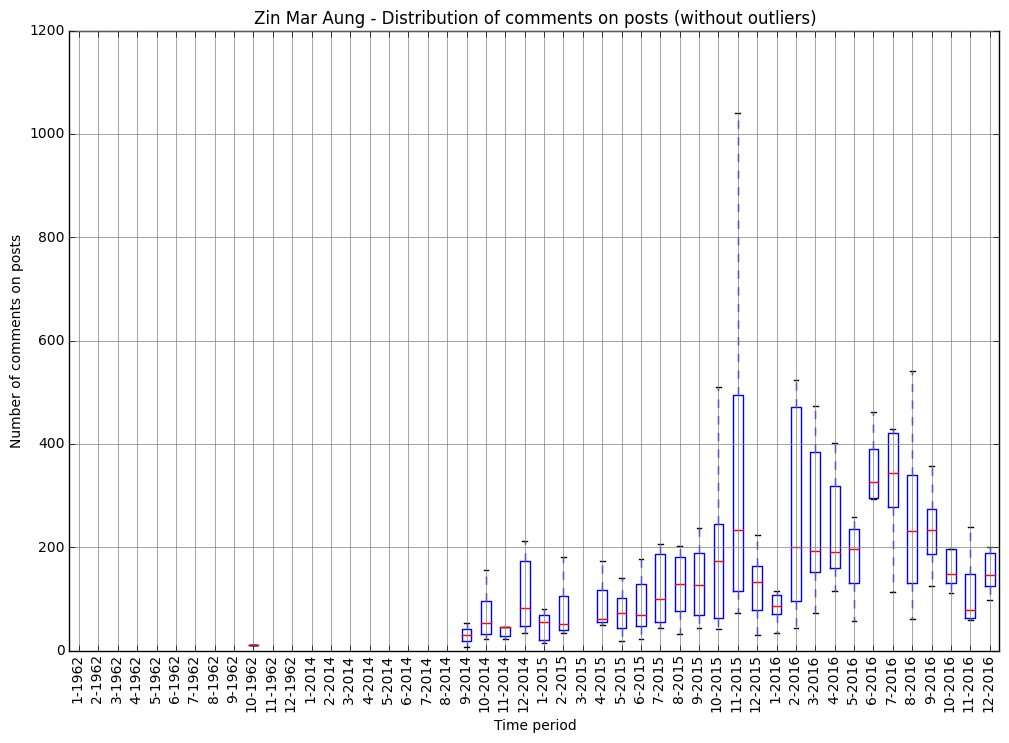

In [16]:
fig1 = plt.figure()
fig1.set_size_inches(12, 8)
ax = fig1.add_subplot(111)
#ax.boxplot(plot_data, showfliers=False)
#ax.boxplot(plot_data, flierprops=dict(marker='|'), vert=False)
ax.boxplot(plot_data, flierprops=dict(marker='_'), showfliers=False)

ax.set_ylabel('Number of comments on posts')
ax.set_xlabel('Time period')
ax.set_title(page_name + ' - Distribution of comments on posts (without outliers)')


#plt.yticks([1, 2, 3, 4, 5], ['2012', '2013', '2014', '2015', '2016'])
#plt.yticks([1, 2], ['2014', '2016'])
plt.xticks(range(1, len(plot_axes_labels)+1), plot_axes_labels)
plt.xticks(rotation=90)
plt.grid(b=True, color='gray', linestyle='-')


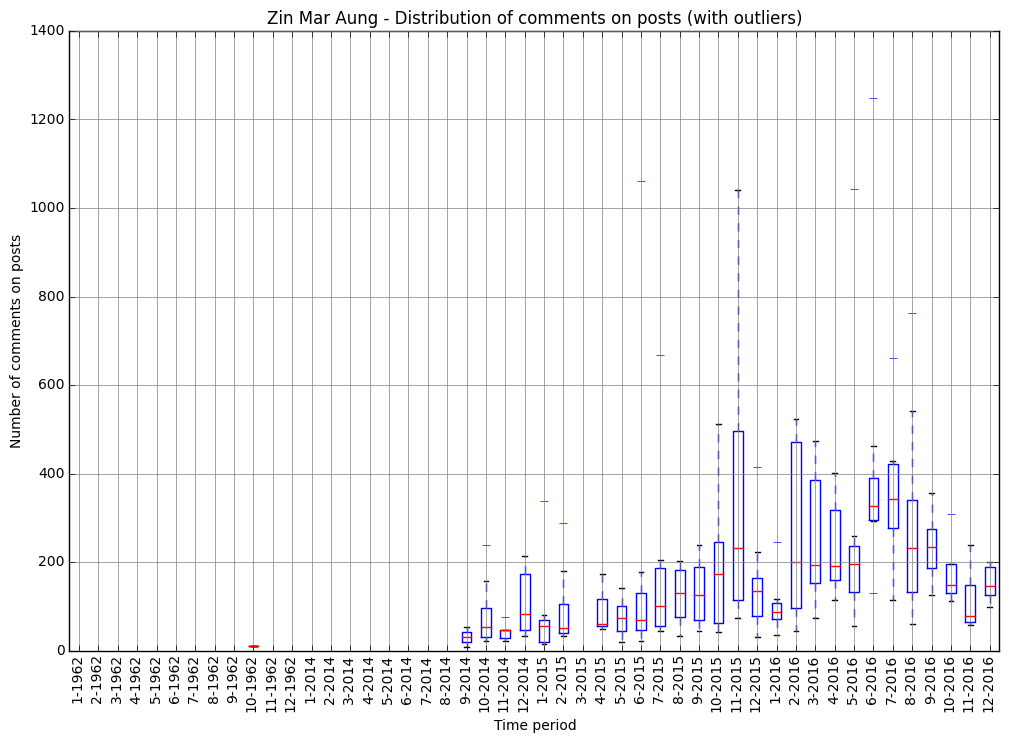

In [17]:
fig2 = plt.figure()
fig2.set_size_inches(12, 8)
ax = fig2.add_subplot(111)
#ax.boxplot(plot_data, showfliers=False)
#ax.boxplot(plot_data, flierprops=dict(marker='|'), vert=False)
ax.boxplot(plot_data, flierprops=dict(marker='_'), showfliers=True)

ax.set_ylabel('Number of comments on posts')
ax.set_xlabel('Time period')
ax.set_title(page_name + ' - Distribution of comments on posts (with outliers)')

#plt.yticks([1, 2, 3, 4, 5], ['2012', '2013', '2014', '2015', '2016'])
#plt.yticks([1, 2], ['2014', '2016'])
plt.xticks(range(1, len(plot_axes_labels)+1), plot_axes_labels)
plt.xticks(rotation=90)

plt.grid(b=True, color='gray', linestyle='-')


## Analyse Replies to Comments

In [18]:
list(df)

['status_id',
 'link_name',
 'status_type',
 'status_link',
 'status_published',
 'num_posts_likes',
 'num_post_comments',
 'num_shares',
 'page_id',
 'comment_id',
 'message',
 'from_id',
 'from_name',
 'comment_published',
 'num_comment_likes',
 'num_sub_comments',
 'message_tags',
 'parent',
 'likes',
 'sub_comments',
 'status_published_dt',
 'year',
 'month']

In [19]:
df['owner_reply'] = (df['from_id'] == 1458941311049016)

In [20]:
df['owner_reply'].value_counts()

False    39159
True       277
Name: owner_reply, dtype: int64

In [21]:
ownerreply_counts = df.pivot_table(index=['status_id'],values=['comment_id','owner_reply'], aggfunc=sum)

In [22]:
ownerreply_counts.describe()

,owner_reply
count,218.000000
mean,1.270642
std,2.283009
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,22.000000


In [23]:
filename = "MinKoNaing_facebook_posts_and_comments"
df = pd.read_csv(filename+'.csv')
df['status_published_dt'] = pd.to_datetime(df['status_published'])
df['year'] = pd.DatetimeIndex(df['status_published_dt']).year
df['month'] = pd.DatetimeIndex(df['status_published_dt']).month
df['owner_reply'] = (df['from_id'] == 1458941311049016)
df['owner_reply'].value_counts()

False    39159
True       277
Name: owner_reply, dtype: int64

In [24]:
ownerreply_counts = df.pivot_table(index=['status_id'],values=['comment_id','owner_reply'], aggfunc=sum)
ownerreply_counts_repliesonly = ownerreply_counts[ownerreply_counts['owner_reply']>0]
ownerreply_counts_repliesonly.describe()

,owner_reply
count,98.000000
mean,2.826531
std,2.686451
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,22.000000


In [ ]:
filename = "MinKoNaing_facebook_posts_and_comments"
df = pd.read_csv(filename+'.csv')
df['status_published_dt'] = pd.to_datetime(df['status_published'])
df['year'] = pd.DatetimeIndex(df['status_published_dt']).year
df['month'] = pd.DatetimeIndex(df['status_published_dt']).month
df['owner_reply'] = (df['from_id'] == 1458941311049016 and (df['year'] == 2016))
df['owner_reply'].value_counts()

In [ ]:
ownerreply_counts = df.pivot_table(index=['status_id'],values=['comment_id','owner_reply'], aggfunc=sum)
ownerreply_counts_repliesonly = ownerreply_counts[ownerreply_counts['owner_reply']>0]
ownerreply_counts_repliesonly.describe()